# Diagnostic Tests of "Create-Your-Own-ANN" Workflow Function

We're now going to use this megalithic class to actually see if our network does anything useful in the slightest. Spoiler: it obviously will crash and burn.

The main point is to verify 100% that our class is working in the way it has to. The first rule is to not fool ourselves. So, let's do that. The plan is to create several networks that are characterized by our list of metaparameters and perform analysis on them.

An overarching goal is to perform what's called "replica averages." Sure, we can define an ANN with a collection of metaparameters and train it $N$ times, but obviously every "replica" of the network will generally be different. We want to see how these networks are different exactly. In particular, we want to see how the (i) weights, (ii) biases, and (iii) loss change across replicas. If the numbers associated with these three quantities do not vary significantly across the network, then we can roughly conclude that the network is converging to a "steady state" when fitting the given function. (We'll once again use the quadratic function to fit just for fun. Obviously, if we changed the underlying function, things would change drastically.)

Let's be 100% clear in what characterizes our densely-connected, feedforward neural network:

- Number of Layers
- Number of Nodes per Layer
- Activation Function per Layer
- Loss Function
- Adam Optimizer with Fixed Learning Rate

Actually, we will more than likely use the Mean Squared Error (MSE) loss function, which fixes one of the variables in our network. We are now optimizing with respect to the MSE Objective Function every time. That should be okay.

One more thing that can technically vary is the data. We can fix this by simply generating $N$ data points (pseudodata) of the form $\{ (x_{i}, y_{i})\}_{i = 1}^{N}$ and seeing if the result changes that much.

## (1): Relevant Libraries:

In [6]:
# (1): Native Python Libraries:
import datetime

# (2): Non-native Python Libraries:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from matplotlib.cm import get_cmap
import tensorflow as tensorflow
import pandas as pd

In [7]:
tensorflow.__version__

'2.15.0'

In [8]:
tensorflow.keras.__version__

AttributeError: module 'keras.api._v2.keras' has no attribute '__version_'

## (2): The Build-Your-Own-ANN Megalithic Class:

In [3]:
class NetworkBuilder:
    def __init__(self, verbose = True):

        # DEBUGGING:
        self.verbose = verbose

        # CONSOLE/TERMINAL MESSAGES:

        # INPUTS:
        self._INPUT_PROMPT_NUMBER_1_NUMBER_OF_ANN_LAYERS = "> How many layers do you want in your ANN architecture?"
        self._INPUT_PROMPT_NUMBER_2_NODES_PER_LAYER = "> Choose how many nodes you want for layer {}."
        self._INPUT_PROMPT_NUMBER_3_ACTIVATION_FUNCTION = "> Choose an activation function for layer {}."
        self._INPUT_PROMPT_NUMBER_4_ACTIVATION_FUNCTION = "> Please select the network's loss function."
        self._INPUT_PROMPT_NUMBER_5_INPUT_SHAPE = "> Please specify the number of inputs of your network."

        # ERRORS
        self._ERROR_PROMPT_NUMBER_1_LAYER_NUMBER_NOT_INT = "> Layer number must be a positive, nonzero integer. Continuing..."
        self._ERROR_PROMPT_NUMBER_2_NODES_PER_LAYER_NOT_INTEGER = "> Number of nodes per layer must be an integer type. Continuing..."
        self._ERROR_PROMPT_NUMBER_3_ACTIVATION_FUNCTION_NOT_STRING = "> Activation functions are of string datatype. Continuing..."
        self._ERROR_PROMPT_NUMBER_3_ACTIVATION_FUNCTION_NOT_IN_LIST = "> User input of `{}` is not included in known list of activation functions."
        self._ERROR_PROMPT_NUMBER_4_LOSS_FUNCTION_NOT_STRING = "> The provided loss function was not a string type. Provide one that is. Continuing..."
        self._ERROR_PROMPT_NUMBER_4_LOSS_FUNCTION_NOT_IN_LIST = "> User input of `{}` is not included in known list of loss functions."
        self._ERROR_PROMPT_NUMBER_5_INPUT_SHAPE_INTEGER = "> The user input of {} wasn't an integer."
        self._ERROR_PROMPT_NUMBER_5_INPUT_SHAPE_NEGATIVE = "> Obviously, the size of the input vector cannot be zero or negative."

        # ACTIVATION FUNCTION NAMES:
        self._ACTIVATION_FUNCTIONS_STRING_ELU = "elu"
        self._ACTIVATION_FUNCTIONS_STRING_EXPONENTIAL = "exponential"
        self._ACTIVATION_FUNCTIONS_STRING_GELU = "gelu"
        self._ACTIVATION_FUNCTIONS_STRING_HARD_SIGMOID = "hard_sigmoid"
        self._ACTIVATION_FUNCTIONS_STRING_LINEAR = "linear"
        self._ACTIVATION_FUNCTIONS_STRING_MISH = "mish"
        self._ACTIVATION_FUNCTIONS_STRING_RELU = "relu"
        self._ACTIVATION_FUNCTIONS_STRING_SELU = "selu"
        self._ACTIVATION_FUNCTIONS_STRING_SIGMOID = "sigmoid"
        self._ACTIVATION_FUNCTIONS_STRING_SOFTMAX = "softmax"
        self._ACTIVATION_FUNCTIONS_STRING_SOFTPLUS = "softplus"
        self._ACTIVATION_FUNCTIONS_STRING_SOFTSIGN = "softsign"
        self._ACTIVATION_FUNCTIONS_STRING_SWISH = "swish"
        self._ACTIVATION_FUNCTIONS_STRING_TANH = "tanh"


        # ACTIVATION FUNCTION ARRAY:
        self._ARRAY_OF_ACCEPTABLE_ACTIVATION_FUNCTIONS = [
            self._ACTIVATION_FUNCTIONS_STRING_ELU,
            self._ACTIVATION_FUNCTIONS_STRING_EXPONENTIAL,
            self._ACTIVATION_FUNCTIONS_STRING_GELU,
            self._ACTIVATION_FUNCTIONS_STRING_HARD_SIGMOID,
            self._ACTIVATION_FUNCTIONS_STRING_LINEAR,
            self._ACTIVATION_FUNCTIONS_STRING_MISH,
            self._ACTIVATION_FUNCTIONS_STRING_RELU,
            self._ACTIVATION_FUNCTIONS_STRING_SELU,
            self._ACTIVATION_FUNCTIONS_STRING_SIGMOID,
            self._ACTIVATION_FUNCTIONS_STRING_SOFTMAX,
            self._ACTIVATION_FUNCTIONS_STRING_SOFTPLUS,
            self._ACTIVATION_FUNCTIONS_STRING_SOFTSIGN,
            self._ACTIVATION_FUNCTIONS_STRING_SWISH,
            self._ACTIVATION_FUNCTIONS_STRING_TANH,
        ]

        # LOSS FUNCTION NAMES:
        self._LOSSES_STRING_BINARY_CROSSENTROPY = "binary crossentropy"
        self._LOSSES_STRING_BINARY_FOCAL_CROSSENTROPY = "binary focal crossentropy"
        self._LOSSES_STRING_CATEGORICAL_CROSSENTROPY = "categorical crossentropy"
        self._LOSSES_STRING_CATEGORICAL_FOCAL_CROSSENTROPY = "categorical focal crossentropy"
        self._LOSSES_STRING_CATEGORICAL_HINGE = "cateogrical hinge"
        self._LOSSES_STRING_COSINE_SIMILARITY = "cosine similarity"
        self._LOSSES_STRING_HINGE = "hinge"
        self._LOSSES_STRING_HUBER = "huber"
        self._LOSSES_STRING_KL_DIVERGENCE = "kl divergence"
        self._LOSSES_STRING_LOG_COSH = "log cosh"
        self._LOSSES_STRING_LOSS = "loss"
        self._LOSSES_STRING_MEAN_ABSOLUTE_ERROR = "mean absolute error"
        self._LOSSES_STRING_MEAN_ABSOLULTE_PERCENTAGE_ERROR = "mean absolute percentage error"
        self._LOSSES_STRING_MEAN_SQUARED_ERROR = "mean squared error"
        self._LOSSES_STRING_MEAN_SQUARED_LOGARITHMIC_ERROR = "mean squared logarithmic error"
        self._LOSSES_STRING_POISSON = "poisson"
        self._LOSSES_STRING_REDUCTION = "reduction"
        self._LOSSES_STRING_SPARCE_CATEGORICAL_CROSSENTROPY = "sparce categorical crossentropy"
        self._LOSSES_STRING_SQUARED_HINGE = "squared hinge"

        # LOSS FUNCTION ARRAY:
        self._ARRAY_OF_ACCEPTABLE_LOSS_FUNCTIONS = [
            self._LOSSES_STRING_BINARY_CROSSENTROPY,
            self._LOSSES_STRING_BINARY_FOCAL_CROSSENTROPY,
            self._LOSSES_STRING_CATEGORICAL_CROSSENTROPY,
            self._LOSSES_STRING_CATEGORICAL_FOCAL_CROSSENTROPY,
            self._LOSSES_STRING_COSINE_SIMILARITY,
            self._LOSSES_STRING_CATEGORICAL_HINGE,
            self._LOSSES_STRING_HUBER,
            self._LOSSES_STRING_KL_DIVERGENCE,
            self._LOSSES_STRING_LOG_COSH,
            self._LOSSES_STRING_LOSS,
            self._LOSSES_STRING_MEAN_ABSOLUTE_ERROR,
            self._LOSSES_STRING_MEAN_ABSOLULTE_PERCENTAGE_ERROR,
            self._LOSSES_STRING_MEAN_SQUARED_ERROR,
            self._LOSSES_STRING_MEAN_SQUARED_LOGARITHMIC_ERROR,
            self._LOSSES_STRING_POISSON,
            self._LOSSES_STRING_REDUCTION,
            self._LOSSES_STRING_SPARCE_CATEGORICAL_CROSSENTROPY,
            self._LOSSES_STRING_SQUARED_HINGE
        ]

        # LOSS FUNCTION DICTIONARY:
        self._DICTIONARY_MAP_USER_INPUT_TO_KERAS_LOSS = {
            self._LOSSES_STRING_BINARY_CROSSENTROPY: tensorflow.keras.losses.BinaryCrossentropy(),
            self._LOSSES_STRING_BINARY_FOCAL_CROSSENTROPY: tensorflow.keras.losses.BinaryFocalCrossentropy(),
            self._LOSSES_STRING_CATEGORICAL_CROSSENTROPY: tensorflow.keras.losses.CategoricalCrossentropy(),
            self._LOSSES_STRING_CATEGORICAL_FOCAL_CROSSENTROPY: tensorflow.keras.losses.CategoricalFocalCrossentropy(),
            self._LOSSES_STRING_CATEGORICAL_HINGE: tensorflow.keras.losses.CategoricalHinge(),
            self._LOSSES_STRING_COSINE_SIMILARITY: tensorflow.keras.losses.CosineSimilarity(),
            self._LOSSES_STRING_HINGE: tensorflow.keras.losses.Hinge(),
            self._LOSSES_STRING_HUBER: tensorflow.keras.losses.Huber(),
            self._LOSSES_STRING_KL_DIVERGENCE: tensorflow.keras.losses.KLDivergence(),
            self._LOSSES_STRING_LOG_COSH: tensorflow.keras.losses.LogCosh(),
            self._LOSSES_STRING_LOSS: tensorflow.keras.losses.Loss(),
            self._LOSSES_STRING_MEAN_ABSOLUTE_ERROR: tensorflow.keras.losses.MeanAbsoluteError(),
            self._LOSSES_STRING_MEAN_ABSOLULTE_PERCENTAGE_ERROR: tensorflow.keras.losses.MeanAbsolutePercentageError(),
            self._LOSSES_STRING_MEAN_SQUARED_ERROR: tensorflow.keras.losses.MeanSquaredError(),
            self._LOSSES_STRING_MEAN_SQUARED_LOGARITHMIC_ERROR: tensorflow.keras.losses.MeanSquaredLogarithmicError(),
            self._LOSSES_STRING_POISSON: tensorflow.keras.losses.Poisson(),
            self._LOSSES_STRING_REDUCTION: tensorflow.keras.losses.Reduction(),
            self._LOSSES_STRING_SPARCE_CATEGORICAL_CROSSENTROPY: tensorflow.keras.losses.SparseCategoricalCrossentropy(),
            self._LOSSES_STRING_SQUARED_HINGE: tensorflow.keras.losses.SquaredHinge(),
            }
        
        # ===== MODEL NAME =====
        self.model_name = None

        # ===== MODEL METAPARAMETERS =====

        # (1): Number of Hidden Layers:
        self.number_of_hidden_layers = None

        # (2): A List of the Number of Nodes per Layer:
        self.list_of_number_of_nodes_per_layer = None

        # (3): A List of Activation Functions per Layer:
        self.list_of_activation_functions_for_each_layer = []

        # (4): Keras Loss Function:
        self.model_loss_function = None

        # (5): Model Input Dimension
        self.number_of_input_variables = 0
    
        # (6): Model Input Layer:
        self.model_input_layer = None

        # (7): Model Output:
        self.model_output_layer = None

    # ===== CLASS METHODS =====

    def obtain_number_of_ANN_hidden_layers(self):
        """
        Description
        --------------
        Obtain the number of hidden layers for the ANN from the user.

        
        Parameters
        --------------
        verbose (boolean):
            Do you want to see all output of this function evaluation?
            
        Notes
        --------------
        (1) We just need to obtain a nonzero, positive integer that
        represents the number of layers in the ANN.

        (2) https://stackoverflow.com/a/23294659 -> For a healthy way
        to construct a while loop like this.
        """
        while True:

            try:
                
                number_of_ANN_layers = int(input(self._INPUT_PROMPT_NUMBER_1_NUMBER_OF_ANN_LAYERS))
                
                if self.verbose:
                    print(f"> Received input: {number_of_ANN_layers} ({type(number_of_ANN_layers)}).")

            except ValueError:

                print(self._ERROR_PROMPT_NUMBER_1_LAYER_NUMBER_NOT_INT)
                continue

            if number_of_ANN_layers <= 0:

                print(self._ERROR_PROMPT_NUMBER_1_LAYER_NUMBER_NOT_INT)
                continue

            else:
                
                print(f"> Received input: {number_of_ANN_layers} ({type(number_of_ANN_layers)}). Exiting...")
                break

        if self.verbose:
            print(f"> User defined {number_of_ANN_layers} Layers in the network.")

        self.number_of_hidden_layers = number_of_ANN_layers
        return None
    
    def obtain_nodes_per_layer(self, number_of_ANN_layers):
        """
        Description
        --------------
        Obtain the number of nodes per layer in the ANN.

        
        Parameters
        --------------
        number_of_ANN_layers (int):
            the number of layers in the ANN

        verbose (boolean):
            prints the intermediate computations of the function
        
        Notes
        --------------
        (1) For all each layer, we need to populate it with a number of neurons.
            So, this function is about obtaining a list of intergers that correspond
            to the number of neurons per layer.

        (2) The output is a list of integers.
        """
        list_of_number_of_nodes_per_layer = []

        for layer_index in range(number_of_ANN_layers):

            while True:

                try:

                    number_of_nodes_per_given_layer = int(input(self._INPUT_PROMPT_NUMBER_2_NODES_PER_LAYER.format(layer_index + 1)))

                    if self.verbose:
                        print(f"> Received input: {number_of_nodes_per_given_layer} ({type(number_of_nodes_per_given_layer)}).")

                except ValueError:

                    print(self._ERROR_PROMPT_NUMBER_2_NODES_PER_LAYER_NOT_INTEGER)
                    continue

                print(f"> Received input: {number_of_nodes_per_given_layer} ({type(number_of_nodes_per_given_layer)}). Exiting...")
                list_of_number_of_nodes_per_layer.append(number_of_nodes_per_given_layer)
                break
            
            print(f"> User defined Layer #{layer_index + 1} to have {number_of_nodes_per_given_layer} nodes.")

        self.list_of_number_of_nodes_per_layer = list_of_number_of_nodes_per_layer
        return None
    
    def check_if_activation_function_included(self, user_entered_activation_function = None):
        """
        Description
        --------------
        Sanitize/verify that the user-typed string corresponds to a given and known
        activation function. Checks against the TensorFlow nomenclature.

        
        Parameters
        --------------
        user_entered_activation_function (string):
            the name of the desired activation function for the layer of nodes
            
        
        Notes
        --------------
        (1): At this stage, we are actually validating the list of valid activation function
            names. There's no real reason to do this, but it keeps us accountable.

        """

        if user_entered_activation_function == None:
            return False
        else:
            if user_entered_activation_function in self._ARRAY_OF_ACCEPTABLE_ACTIVATION_FUNCTIONS:
                return True
            else:
                return False
            
    def construct_array_of_layer_activation_functions(self, number_of_ANN_layers):
        """
        Description
        --------------
        Obtain the activation functions for each neuron in a given layer 
        from the user. There are only a few acceptable options for the 
        types of activation functions.


        Parameters
        --------------
        number_of_ANN_layers (int): 
            The number of layers, not including the input data, in the network.
        
            
        Notes
        --------------
        (1) For all neurons in a given layer, we will apply the same activation function.
        """
        list_of_activation_functions_for_each_layer = []

        for layer_index in range(number_of_ANN_layers):

            while True:

                try:

                    user_proposed_activation_function = str(input(self._INPUT_PROMPT_NUMBER_3_ACTIVATION_FUNCTION.format(layer_index + 1)))
                    if self.verbose:
                        print(f"> Received input: {user_proposed_activation_function} ({type(user_proposed_activation_function)}).")

                except ValueError:

                    print(self._ERROR_PROMPT_NUMBER_3_ACTIVATION_FUNCTION_NOT_STRING)
                    continue

                if not self.check_if_activation_function_included(user_proposed_activation_function):

                    print(self._ERROR_PROMPT_NUMBER_3_ACTIVATION_FUNCTION_NOT_IN_LIST.format(user_proposed_activation_function))
                    continue

                else:

                    print(f"> Received input: {user_proposed_activation_function} ({type(user_proposed_activation_function)}). Exiting...")
                    list_of_activation_functions_for_each_layer.append(user_proposed_activation_function)
                    break
            
            print(f"> User defined layer number {layer_index + 1} to use {user_proposed_activation_function} activation.")

        self.list_of_activation_functions_for_each_layer = list_of_activation_functions_for_each_layer
        return None

    def check_if_loss_function_included(self, user_entered_loss_function = None):
        """
        Description
        --------------
        Sanitize/verify that the user-typed string corresponds to a given and known
        activation function. Checks against the TensorFlow nomenclature.

        
        Parameters
        --------------
        user_entered_activation_function (string): 
            the name of the desired loss functions
            
        
        Notes
        --------------
        (1): This is just an intermediate validation. We want to make sure we
            are referring to things that exist. That's why we put this 
            intermediate validation here.

        """

        if user_entered_loss_function == None:
            return False
        else:
            if user_entered_loss_function in self._ARRAY_OF_ACCEPTABLE_LOSS_FUNCTIONS:
                return True
            else:
                return False

    def choose_network_loss_function(self):
        """
        Description
        --------------
        We need a loss function in comparing the model's terrible output with
        actual data. All this function involves is choosing the loss function.


        Parameters
        --------------
            verbose (boolean):
                prints out the intermediate steps in a calculation
        
            
        Notes
        --------------
        """
        while True:

            try:

                user_proposed_loss_function = str(input(self._INPUT_PROMPT_NUMBER_4_ACTIVATION_FUNCTION))
                if self.verbose:
                    print(f"> Received user input of {user_proposed_loss_function} ({type(user_proposed_loss_function)}).")

            except ValueError:

                print(self._ERROR_PROMPT_NUMBER_4_LOSS_FUNCTION_NOT_STRING)
                continue

            if not self.check_if_loss_function_included(user_proposed_loss_function):

                print(self._ERROR_PROMPT_NUMBER_4_LOSS_FUNCTION_NOT_IN_LIST.format(user_proposed_loss_function))
                continue

            else:

                print(f"> Received user input of {user_proposed_loss_function} ({type(user_proposed_loss_function)}). Exiting...")
                break
            
        self.user_entered_loss_function = user_proposed_loss_function.lower()
        self.model_loss_function = self.translate_user_input_loss_function_to_keras_loss_function(user_proposed_loss_function)
        return None
    
    def translate_user_input_loss_function_to_keras_loss_function(self, string_user_input_loss_function):
        """
        Description
        --------------
        All this function does is it takes a string of user input that is supposed to
        represent the name of some popular loss function (those included in TensorFlow)
        and attempt to match it with the existing classes available. If the class
        exists, we return that TF instance. If the class does not, then we tell the user
        to get good.

        Parameters
        --------------
        string_user_input_loss_function (string)
            the name of the desired loss function as a string
        
            
        Notes
        --------------
        (1): We reference a huge dictionary.
        """
        try:
            return self._DICTIONARY_MAP_USER_INPUT_TO_KERAS_LOSS.get(string_user_input_loss_function, None)
        
        except Exception as E:
            print(f"> Error in translating input: {string_user_input_loss_function} to Keras Loss class instance:\n> {E}")
            return None

    def obtain_number_of_input_variables(self):
        """
        Description
        --------------
        The number of input variables in the feed-forward network.


        Parameters
        --------------
        number_of_input_variables (int): 
            The number of input variables we want to feed into the network.
        
            
        Notes
        --------------
        (1) Unusually, the input layer is defined according to a "vector" of
            length number_of_input_variables. So, we need to obtain the dimension
            of this "input vector." That's what this function is about.
        """
        while True:

                try:

                    number_of_input_variables = int(input(self._INPUT_PROMPT_NUMBER_5_INPUT_SHAPE))
                    if self.verbose:
                        print(f"> Received input: {number_of_input_variables} ({type(number_of_input_variables)}).")

                except ValueError:

                    print(self._ERROR_PROMPT_NUMBER_5_INPUT_SHAPE_INTEGER.format(number_of_input_variables))
                    continue

                if number_of_input_variables <= 0:

                    print(self._ERROR_PROMPT_NUMBER_5_INPUT_SHAPE_NEGATIVE)
                    continue

                else:

                    print(f"> Received user input of {number_of_input_variables} ({type(number_of_input_variables)}). Exiting...")
                    self.number_of_input_variables = number_of_input_variables
                    break
            
        return None
    
    def calculate_output_layer_as_nested_hidden_layers(self, inputs, number_of_hidden_layers, list_of_nodes_per_layer, list_of_activation_functions):
        """
        Description
        --------------
        This function performs a recursive call to itself in order to properly
        nest every instance of a Keras Dense() instance into an earlier one. That
        is how we can stack Dense layers together.

        Parameters
        --------------
        input (Keras Dense() or Input() instance): 
            the way this works is that we need to stack Dense()() layers
            so that we can get the recursion Dense(N)(Dense(M)(Dense(P)(...))).

        number_of_hidden_layers (int): 
            while we don't use a for-loop below, we are using this integer to 
            effectively perform a loop by decrementing an index number.
        
            
        Notes
        --------------
        None
        """
        if len(list_of_nodes_per_layer) is not len(list_of_activation_functions):
            print(f"> Mismatching length of lists: {len(list_of_nodes_per_layer)} in list of nodes per layer but {len(list_of_activation_functions)} in list of activation functions.")
            return None

        if number_of_hidden_layers == 0:
            return inputs
        
        else:
            
            number_of_nodes_in_this_layer = list_of_nodes_per_layer[number_of_hidden_layers - 1]
            activation_function_in_this_layer = list_of_activation_functions[number_of_hidden_layers - 1]


            if self.verbose:
                print(f"> Now initializing a TF Dense() layer with {number_of_nodes_in_this_layer} nodes and {activation_function_in_this_layer} activations.")
                
                # Kernel Initializers are a little tough. There are two that are decent:
                #
                # https://www.tensorflow.org/api_docs/python/tf/keras/initializers/RandomUniform
                # tensorflow.keras.initializers.RandomUniform minval = -0.1,maxval = 0.1)

                #
                # https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform
                # tensorflow.keras.initializers.GlorotUniform()
            nested_layer = tensorflow.keras.layers.Dense(
                number_of_nodes_in_this_layer,
                activation = activation_function_in_this_layer,
                use_bias = True,
                kernel_initializer = tensorflow.keras.initializers.RandomUniform(
                    minval = -0.1,
                    maxval = 0.1
                ),
                bias_initializer = 'zeros',
                kernel_regularizer = None,
                bias_regularizer = None,
                activity_regularizer = None,
                kernel_constraint = None,
                bias_constraint = None,
                name = f"hidden_layer_{number_of_hidden_layers}",
                )(self.calculate_output_layer_as_nested_hidden_layers(inputs, number_of_hidden_layers - 1, list_of_nodes_per_layer, list_of_activation_functions))
            return nested_layer
        
    def register_tensorflow_model(self, input_layer, output_layer):
        """
        Description
        --------------
        All this function does is return for us a Keras Model() instance
        with the inputs and outputs kwargs specified. 

        Parameters
        --------------
        input_layer (Keras Input() instance): 
            the actual Keras Input() layer instance

        output_layer (Keras Input() instance): 
            this should be some kind of Keras Layer() instance as 
            obtained by nesting layers together
        
            
        Notes
        --------------
        None
        """

        try:

            new_tensorflow_model = tensorflow.keras.models.Model(
                inputs = input_layer,
                outputs = output_layer,
                name = self.model_name
            )
            self.tensorflow_network = new_tensorflow_model
        
        except Exception as E:
            
            print(f"> Error in constructing a Keras model:\n> {E}")
            return None

    def compile_tensorflow_network(self, tensorflow_network, keras_loss_function):
        """
        Description
        --------------
        Actually compile the TensorFlow ANN with all the details that 
        we supplied earlier. In reality, this function does nothing but
        use the .compile() method, sets the (i) optimizer, (ii) loss,
        and (iii) metrics.

        Parameters
        --------------
        tensorflow_network (int): 
            The number of input variables we want to feed into the network.
        
            
        Notes
        --------------
        (1) Unusually, the input layer is defined according to a "vector" of
            length number_of_input_variables. So, we need to obtain the dimension
            of this "input vector." That's what this function is about.
        """
        if tensorflow_network == None:
            print(f"> No TensorFlow network instance supplied. Exiting...")
            return None
        
        try:
            tensorflow_network.compile(
            optimizer = tensorflow.keras.optimizers.Adam(
                learning_rate = 0.001,
                beta_1 = 0.9,
                beta_2 = 0.999,
                epsilon = 1e-07,
                amsgrad = False,
                weight_decay = None,
                clipnorm = None,
                clipvalue = None,
                global_clipnorm = None,
                use_ema = False,
                ema_momentum = 0.99,
                ema_overwrite_frequency = None,
                jit_compile = True,
                name='Optimizer_Adam',
            ),
            loss = keras_loss_function,
            metrics = tensorflow.keras.metrics.MeanSquaredError(),
            loss_weights = None,
            weighted_metrics = None,
            run_eagerly = None,
            steps_per_execution = None,
            jit_compile = None,
            pss_evaluation_shards = 0,
        )
            self.tensorflow_network = tensorflow_network
            return None
        except Exception as E:
            print(f"> Error in compiling the TensorFlow network:\n> {E}")
            return None

    def describe_tensorflow_network(self, tensorflow_network):
        """
        Description
        --------------
        TensorFlow's description of the network.

        Parameters
        --------------
        tensorflow_network (int): 
            The instance of the tensorflow network.
        
            
        Notes
        --------------
        None
        """
        try:
            return tensorflow_network.summary()
        
        except Exception as E:
            
            print(f"> Error in describing the TF network:\n> {E}")
            return None

    def construct_model_name(self):
        """
        Description
        --------------
        We build the name of the model:

        Parameters
        --------------
        None    
            
        Notes
        --------------
        None
        """
        number_of_layers = self.number_of_hidden_layers + 1

        if self.verbose:
            print(f"> Total number of layers computed as: {number_of_layers}")

        current_timestamp = self.generate_timestamp()
        
        if current_timestamp == None:
            print(f"> Issue generating model name -- Received NoneType from timestamp.")
            return None
            
        if self.verbose:
            print(f"> Computed current timestamp as: {current_timestamp}")

        model_name = f"model{current_timestamp}_{number_of_layers}{''.join(str(nodes) + word for nodes, word in zip(self.list_of_number_of_nodes_per_layer, self.list_of_activation_functions_for_each_layer))}"
        print(model_name)

        self.model_name = model_name

    def generate_timestamp(self):
        try:

            timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

            if self.verbose:
                print(f"> Computed the timestamp to be: {timestamp}")

            return timestamp
        
        except Exception as E:
            print(f"> Error in generating the timestamp:\n> {E}")
            return None

        
    def build_network(self):
        
        # (1): Obtain the number of layers:
        self.obtain_number_of_ANN_hidden_layers()
        if self.verbose:
            print(f"> [1]: Obtained number of ANN hidden layers.")

        # (2): Obtain the number of nodes per layer:
        self.obtain_nodes_per_layer(self.number_of_hidden_layers)
        if self.verbose:
            print(f"> [2]: Obtained list with number of nodes per layer.")

        # (3): Obtain the activation functions for each layer:
        self.construct_array_of_layer_activation_functions(self.number_of_hidden_layers)
        if self.verbose:
            print(f"> [3]: Obtained activation functions for each layer.")

        # (4): Obtain the network's loss function:
        self.choose_network_loss_function()
        if self.verbose:
            print(f"> [4]: Obtained the network's loss function.")

        # (5): Obtain the Network Input Dimensionality:
        self.obtain_number_of_input_variables()
        if self.verbose:
            print(f"> [5]: Obtained the input layer's dimensionality.")

        # (6): Obtain the Actual Network Inputs (Keras Layers):
        self.model_input_layer = tensorflow.keras.layers.Input(shape = (self.number_of_input_variables, ))
        if self.verbose:
            print(f"> [6]: Registered the network's first layer.")

        # (7): Obtain the Actual Network Outputs (Keras Layers):
        self.model_output_layer = self.calculate_output_layer_as_nested_hidden_layers(
            self.model_input_layer,
            self.number_of_hidden_layers,
            self.list_of_number_of_nodes_per_layer,
            self.list_of_activation_functions_for_each_layer
        )
        if self.verbose:
            print(f"> [7]: Computed the network's output layer.")

        # (8): Construct the name of the Model:
        self.construct_model_name()
        if self.verbose:
            print(f"> [8]: Model name derived.")

        # (9): Register the TensorFlow Model:
        self.register_tensorflow_model(self.model_input_layer, self.model_output_layer)
        if self.verbose:
            print(f"> [9]: Registered TensorFlow model...")

        # (10): Compile the Model:
        self.compile_tensorflow_network(self.tensorflow_network, self.model_loss_function)
        if self.verbose:
            print(f"> [10]: Network compiled!")

        # (11): Describe the Model:
        self.describe_tensorflow_network(self.tensorflow_network)
        if self.verbose:
            print(f"> [11]: Network described.")

        return self.tensorflow_network

### (2.2): Designing a Callback that Lets Us See the Evolution of the Weights and Biases

In [4]:
class WeightsBiasesCallback(tensorflow.keras.callbacks.Callback):

    def __init__(self, model):
        super(WeightsBiasesCallback, self).__init__()
        self.weights_biases_history = {}
        self.model = model

    def on_epoch_end(self, epoch, logs=None):

        for layer_index, layer in enumerate(self.model.layers):

            if isinstance(layer, tensorflow.keras.layers.Dense):

                # the result of .get_weights() is a NumPy Array:
                layer_weights = layer.get_weights()[0]
                layer_biases = layer.get_weights()[1]
                
                shape_of_weights = layer_weights.shape
                shape_of_biases = layer_biases.shape[0]

                if layer_weights.ndim == 2:

                    number_of_rows_weight_kernel, number_of_columns_weight_kernel = shape_of_weights

                    for row in range(number_of_rows_weight_kernel):

                        for column in range(number_of_columns_weight_kernel):

                            weight_key = f'w^{{({layer_index})}}_{{{row}{column}}}'
                            weight_value = layer_weights[row, column]
                            self.weights_biases_history.setdefault(weight_key, []).append(weight_value)

                else:

                    for column in range(shape_of_weights):

                        weight_key = f'w^{{({layer_index})}}_{{{column}}}'
                        weight_value = layer_weights[column]
                        self.weights_biases_history.setdefault(weight_key, []).append(weight_value)

                for bias_index in range(shape_of_biases):

                    bias_key = f'b^{{({layer_index})}}_{{{bias_index}}}'
                    bias_value = layer_biases[bias_index].tolist()
                    self.weights_biases_history.setdefault(bias_key, []).append(bias_value)


## (3): Details of the "Underlying Function"

### (3.1): The Quadratic Function:

We are choosing the underlying function to be quadratic. This should be a simple-enough function to start our fitting procedure and analysis with. Remember, the Quadratic Function is characterized by three parameters.

In [5]:
def quadratic_function(x, coefficient_a, coefficient_b, coefficient_c):
    """
    Description
    --------------
    Returns the output of a quadratic function given an input and the 
    standard three parameters characterizing a quadratic function.

    
    Parameters
    --------------
    x : (num)

    coefficient_a : (num)

    coefficient_b : (num)

    coefficient_c : (num)


    Function Flow
    --------------

    
    Notes
    --------------
    (1): The quadratic function has three "parameters." These are roughly
        called "A", "B", and "C." Only after specifying those three parameters
        will the function actually return an output given an input. In other
        words, besides supplying an independent variable, you need those
        three other pieces of information -- the parameters -- in order to
        get a number as an ouput.
    """
    try:
        corresponding_y_value = coefficient_a * x**2 + coefficient_b * x + coefficient_c
        return corresponding_y_value
    except Exception as E:
        INTEGER_ZERO = 0
        return INTEGER_ZERO

### (3.2): Sample from a Normal Distribution:

We need this because this will be how we generate the "noise" in our underlying function. Remember, we want the pseudodata to not exactly fit the quadratic, obviously. We need to make it "look like" it came from an experiment where the measured quantity has some random noise.

In [6]:
def sample_normal_distribution(mean_value, standard_deviation):
    """
    Description
    --------------
    Uses Numpy's function random.normal() to sample a normal distribution
    with a mean of "loc" and a standard deviation of "scale," the two WORST
    KWARGS I'VE EVER SEEN IN PYTHON.

    
    Parameters
    --------------
    mean : (float)

    standard_deviation : (float)


    Function Flow
    --------------

    
    Notes
    --------------
    (1): The quadratic function has three "parameters." These are roughly
        called "A", "B", and "C." Only after specifying those three parameters
        will the function actually return an output given an input. In other
        words, besides supplying an independent variable, you need those
        three other pieces of information -- the parameters -- in order to
        get a number as an ouput.
    """
    try:
        randomly_sampled_variable = np.random.normal(
            loc = mean_value,
            scale = standard_deviation
        )
        return randomly_sampled_variable
    
    except Exception as E:
        print(f"> Error in sampling normal distribution:\n> {E}!")
        return None

### (3.3): Sampling the Underlying Function:

Now, we just use the above two functions and construct another one that samples the underlying function. This was the primary goal.

In [7]:
def sample_underlying_function(x_value):
    """
    Description
    --------------
    This function provides a method to generate 
    so-called "experimental data" that comes from an
    underlying function.

    Parameters
    --------------

    Function Flow?
    --------------
    """
    _PARAMETER_A = 2
    _PARAMETER_B = -3
    _PARAMETER_C = 1
    _PARAMETER_D = 1.3

    _RANDOM_NOISE_MEAN = 0
    _RANDOM_NOISE_STANDARD_DEVIATION = 1
    
    try:
        quadratic_function_ouput = quadratic_function(x_value, _PARAMETER_A, _PARAMETER_B, _PARAMETER_C)
        random_noise_contribution = sample_normal_distribution(_RANDOM_NOISE_MEAN, _RANDOM_NOISE_STANDARD_DEVIATION)
        return quadratic_function_ouput + random_noise_contribution
    
    except Exception as E:
        print(f"> Error in the quadratic formula: {E}")
        return 0

### (3.4): Generating Pseudodata:

Now, we apply every function we wrote to generate pseudodata. The point of this is to obtain basically a plot of the measured quantity as a function of the presumed independent quantity. We want the function to have an argument that is an integer that reflects the number of sampled data points. The reason for this is because the form of the underlying function becomes a lot more difficult to predict if we make the data more sparse. So, for a high value of $N$, the underlying function will be easier for anyone to see. With a smaller number of $N$, there might not even look like an underlying function at all. This capability provides an element of realism; Some experiments don't always have a plethora of data available.

In [8]:
def generate_pseudodata(n_rounds):
    """
    Description
    --------------
    We generate, for N-rounds, a collection of outputs based on inputs.
    In essence, this is just plugging-and-chugging, for a given list of 
    x-values, what some f(x) is. In this case, we are using the quadratic
    function as the "underlying function" to generate our output.

    Parameters
    --------------

    Function Flow
    --------------
    
    Notes
    --------------
    (1): 


    """
    _are_sampling_normal_distribution = False
    _X_MEAN_VALUE = 0
    _X_STANDARD_DEVIATION = np.random.choice([1.2, 1.5], 1)[0]

    pseudodata_x_values = []
    pseudodata_y_values = []

    for iteration in range(n_rounds):

        if _are_sampling_normal_distribution:
            randomly_sampled_x = sample_normal_distribution(_X_MEAN_VALUE, _X_STANDARD_DEVIATION)
            
        else:
            randomly_sampled_x = 0.1 * np.random.randint(-50, 50)

        pseudodata_x_values.append(randomly_sampled_x)
        pseudodata_y_values.append(sample_underlying_function(randomly_sampled_x))

    return pseudodata_x_values, pseudodata_y_values 

### (3.4): Showing the Differences in Plotting Rich, Medium, and Sparse Data:

In [9]:
NUMBER_OF_DATA_POINTS_RICH = 1000
NUMBER_OF_DATA_POINTS_MEDIUM = 200
NUMBER_OF_DATA_POINTS_SPARSE = 50

training_x_data_rich, training_y_data_rich = generate_pseudodata(NUMBER_OF_DATA_POINTS_RICH)
training_x_data_medium, training_y_data_medium = generate_pseudodata(NUMBER_OF_DATA_POINTS_MEDIUM)
training_x_data_sparse, training_y_data_sparse = generate_pseudodata(NUMBER_OF_DATA_POINTS_SPARSE)

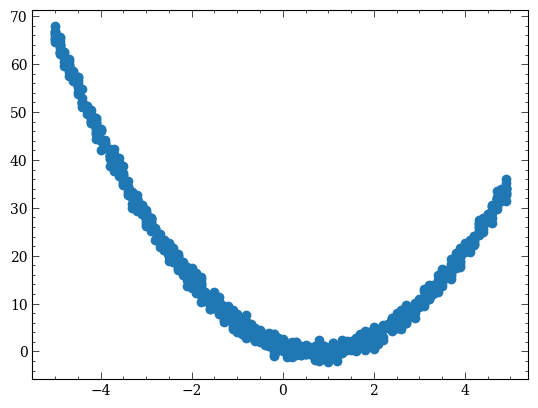

In [10]:
plt.rcParams["font.family"] = "serif"

plt.rcParams["mathtext.fontset"] = "cm" # https://matplotlib.org/stable/gallery/text_labels_and_annotations/mathtext_fontfamily_example.html


# These slightly-modified styles come from: https://github.com/garrettj403/SciencePlots/blob/master/scienceplots/styles/science.mplstyle
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 0.5     
plt.rcParams['xtick.minor.size'] = 2.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.top'] = True

# Set y axis
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.right'] = True

plt.scatter(training_x_data_rich, training_y_data_rich)

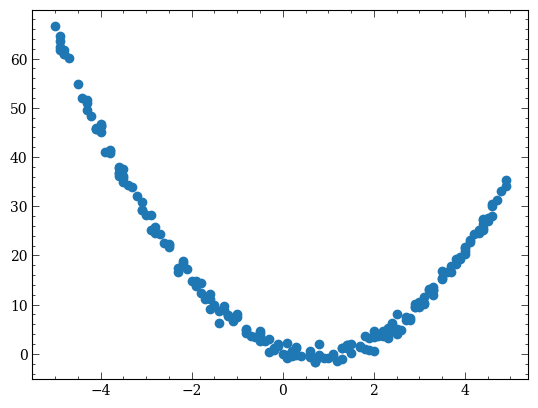

In [11]:
plt.scatter(training_x_data_medium, training_y_data_medium)

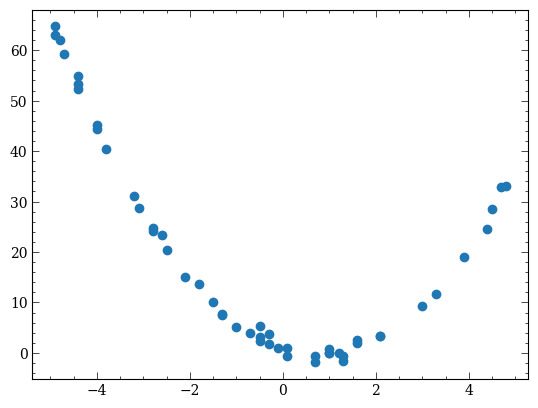

In [12]:
plt.scatter(training_x_data_sparse, training_y_data_sparse)

## (4): Constructing Networks that are Proof-of-Concept:

We'll now turn to the process of actually designing ANNs and running them to fit the data. What we'll need is a basic "workflow" that sets up the network, trains it (fits it), shows the loss over epochs, and then predicts the results.

### (4.1): Constructing the "Rich Network":

> Received input: 2 (<class 'int'>).
> Received input: 2 (<class 'int'>). Exiting...
> User defined 2 Layers in the network.
> [1]: Obtained number of ANN hidden layers.
> Received input: 50 (<class 'int'>).
> Received input: 50 (<class 'int'>). Exiting...
> User defined Layer #1 to have 50 nodes.
> Received input: 1 (<class 'int'>).
> Received input: 1 (<class 'int'>). Exiting...
> User defined Layer #2 to have 1 nodes.
> [2]: Obtained list with number of nodes per layer.
> Received input: relu (<class 'str'>).
> Received input: relu (<class 'str'>). Exiting...
> User defined layer number 1 to use relu activation.
> Received input: relu (<class 'str'>).
> Received input: relu (<class 'str'>). Exiting...
> User defined layer number 2 to use relu activation.
> [3]: Obtained activation functions for each layer.
> Received user input of mean squared error (<class 'str'>).
> Received user input of mean squared error (<class 'str'>). Exiting...
> [4]: Obtained the network's loss function.
>

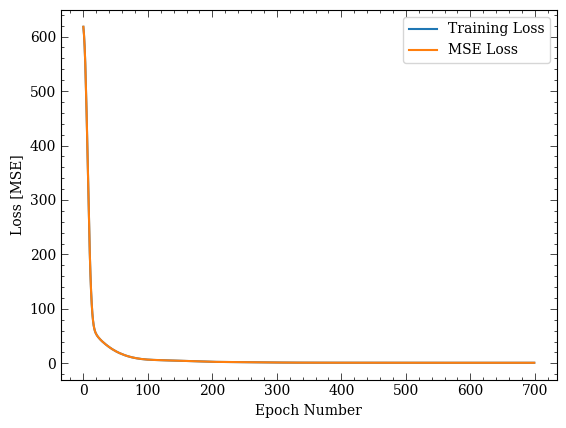

32/32 [==============================] - 0s 1ms/step


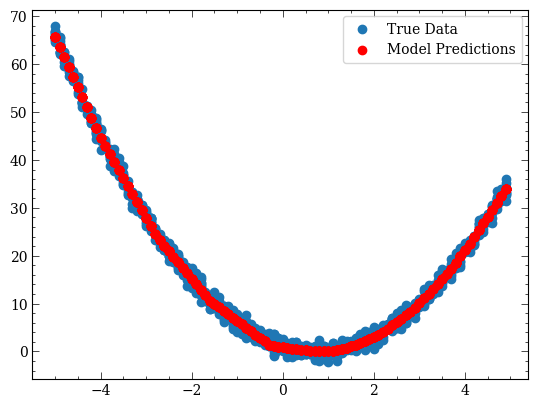

w^{(1)}_{00} - Values over epochs: [-0.06190432, -0.096198566, -0.13456528, -0.17379926, -0.21238372, -0.2538494, -0.29488498, -0.3359836, -0.37481132, -0.411354, -0.44681537, -0.47953317, -0.5084323, -0.5347425, -0.55734444, -0.57716054, -0.5936591, -0.60743546, -0.6196524, -0.6296449, -0.6379874, -0.64530635, -0.65122, -0.65711486, -0.66245824, -0.6673191, -0.6726463, -0.6756918, -0.6794748, -0.6834442, -0.68796664, -0.69058985, -0.6952289, -0.69837195, -0.70219404, -0.70620376, -0.7082715, -0.71173966, -0.71598613, -0.7187669, -0.7213997, -0.7247052, -0.72753465, -0.7309499, -0.7343183, -0.736035, -0.73901856, -0.74061745, -0.7425716, -0.7461251, -0.7471074, -0.75016505, -0.75288975, -0.7550323, -0.75718653, -0.7591151, -0.76155835, -0.76182884, -0.76628286, -0.76710045, -0.76930094, -0.770319, -0.77270883, -0.7741115, -0.77551126, -0.77780366, -0.780155, -0.78030515, -0.78231883, -0.7836165, -0.7848466, -0.7869098, -0.78782517, -0.7893565, -0.7911355, -0.79266286, -0.7942428, -0.79

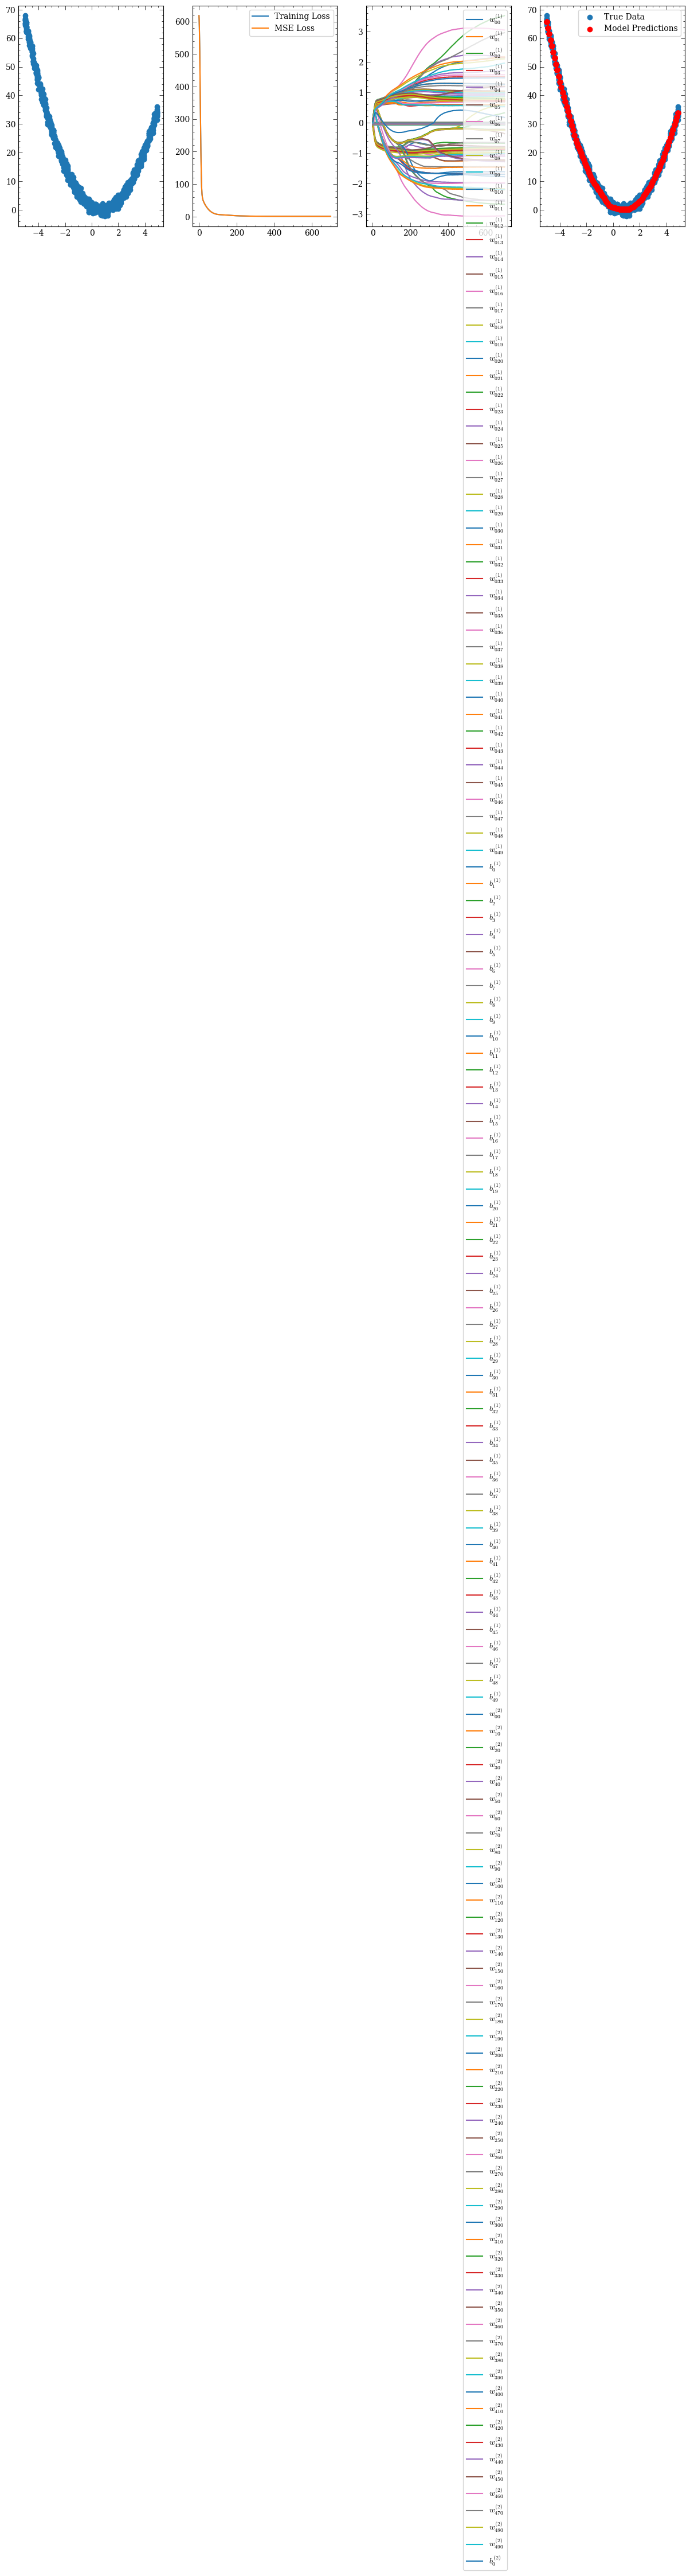

In [13]:
# (1): Create a TensorFlow network:
tensorflow_network_1 = NetworkBuilder().build_network()

# (2): Train the network:
collect_weights_and_biases_callback = WeightsBiasesCallback(tensorflow_network_1)
history_of_training_1 = tensorflow_network_1.fit(
    training_x_data_rich, 
    training_y_data_rich, 
    epochs = 700,
    # validation_split = 0.2, # https://www.tensorflow.org/guide/keras/training_with_built_in_methods#automatically_setting_apart_a_validation_holdout_set
    callbacks = [collect_weights_and_biases_callback],
    verbose = 1)

# (3): Construct the loss plot:
training_loss_data_1 = history_of_training_1.history['loss']
mean_squared_error_1 = history_of_training_1.history['mean_squared_error']
plt.plot(training_loss_data_1, label='Training Loss')
plt.plot(mean_squared_error_1, label='MSE Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss [MSE]')
plt.legend()
plt.show()

model_predictions_1 = tensorflow_network_1.predict(training_x_data_rich)

plt.scatter(training_x_data_rich, training_y_data_rich, label='True Data')
plt.scatter(training_x_data_rich, model_predictions_1, color='red', label='Model Predictions')
plt.legend()
plt.show()

figure, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 5)) 

axes[0].scatter(training_x_data_rich, training_y_data_rich)

training_loss_data_1 = history_of_training_1.history['loss']
mean_squared_error_1 = history_of_training_1.history['mean_squared_error']

axes[1].plot(training_loss_data_1, label='Training Loss')
axes[1].plot(mean_squared_error_1, label='MSE Loss')
axes[1].legend()

weights_biases_history = collect_weights_and_biases_callback.weights_biases_history

for key, values in weights_biases_history.items():
    print(f'{key} - Values over epochs: {values}')

for key, values in weights_biases_history.items():
    print(key)
    axes[2].plot(values, label = r"${}$".format(key))
    axes[2].legend()

axes[3].scatter(training_x_data_rich, training_y_data_rich, label='True Data')
axes[3].scatter(training_x_data_rich, model_predictions_1, color='red', label='Model Predictions')
axes[3].legend()

### (4.2): Constructing the "Medium Network":

> Received input: 2 (<class 'int'>).
> Received input: 2 (<class 'int'>). Exiting...
> User defined 2 Layers in the network.
> [1]: Obtained number of ANN hidden layers.
> Received input: 50 (<class 'int'>).
> Received input: 50 (<class 'int'>). Exiting...
> User defined Layer #1 to have 50 nodes.
> Received input: 1 (<class 'int'>).
> Received input: 1 (<class 'int'>). Exiting...
> User defined Layer #2 to have 1 nodes.
> [2]: Obtained list with number of nodes per layer.
> Received input: RELU (<class 'str'>).
> User input of `RELU` is not included in known list of activation functions.
> Received input: relu (<class 'str'>).
> Received input: relu (<class 'str'>). Exiting...
> User defined layer number 1 to use relu activation.
> Received input: relu (<class 'str'>).
> Received input: relu (<class 'str'>). Exiting...
> User defined layer number 2 to use relu activation.
> [3]: Obtained activation functions for each layer.
> Received user input of mean squared error (<class 'str'>).


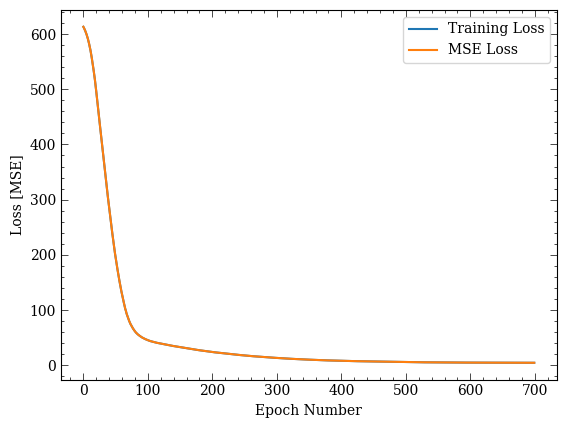

7/7 [==============================] - 0s 1ms/step


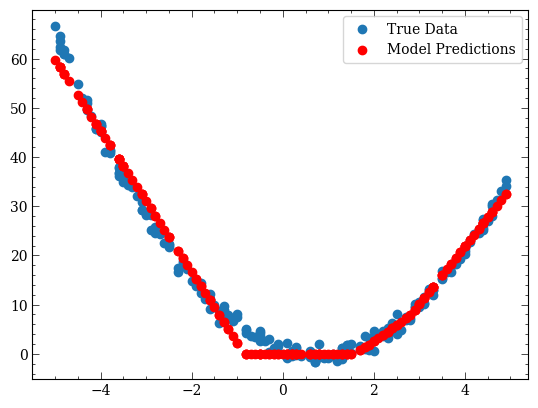

w^{(1)}_{00} - Values over epochs: [0.04425045, 0.037774444, 0.03175851, 0.025781393, 0.020048203, 0.014184117, 0.009170797, 0.0057659247, 0.0040328656, 0.0031559092, 0.0027143867, 0.0024930458, 0.0023824917, 0.002327446, 0.002300113, 0.002286573, 0.0022798793, 0.0022765764, 0.002274949, 0.0022741486, 0.0022737551, 0.0022735624, 0.0022734678, 0.0022734215, 0.0022733987, 0.0022733877, 0.0022733824, 0.0022733798, 0.0022733782, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378, 0.002273378,

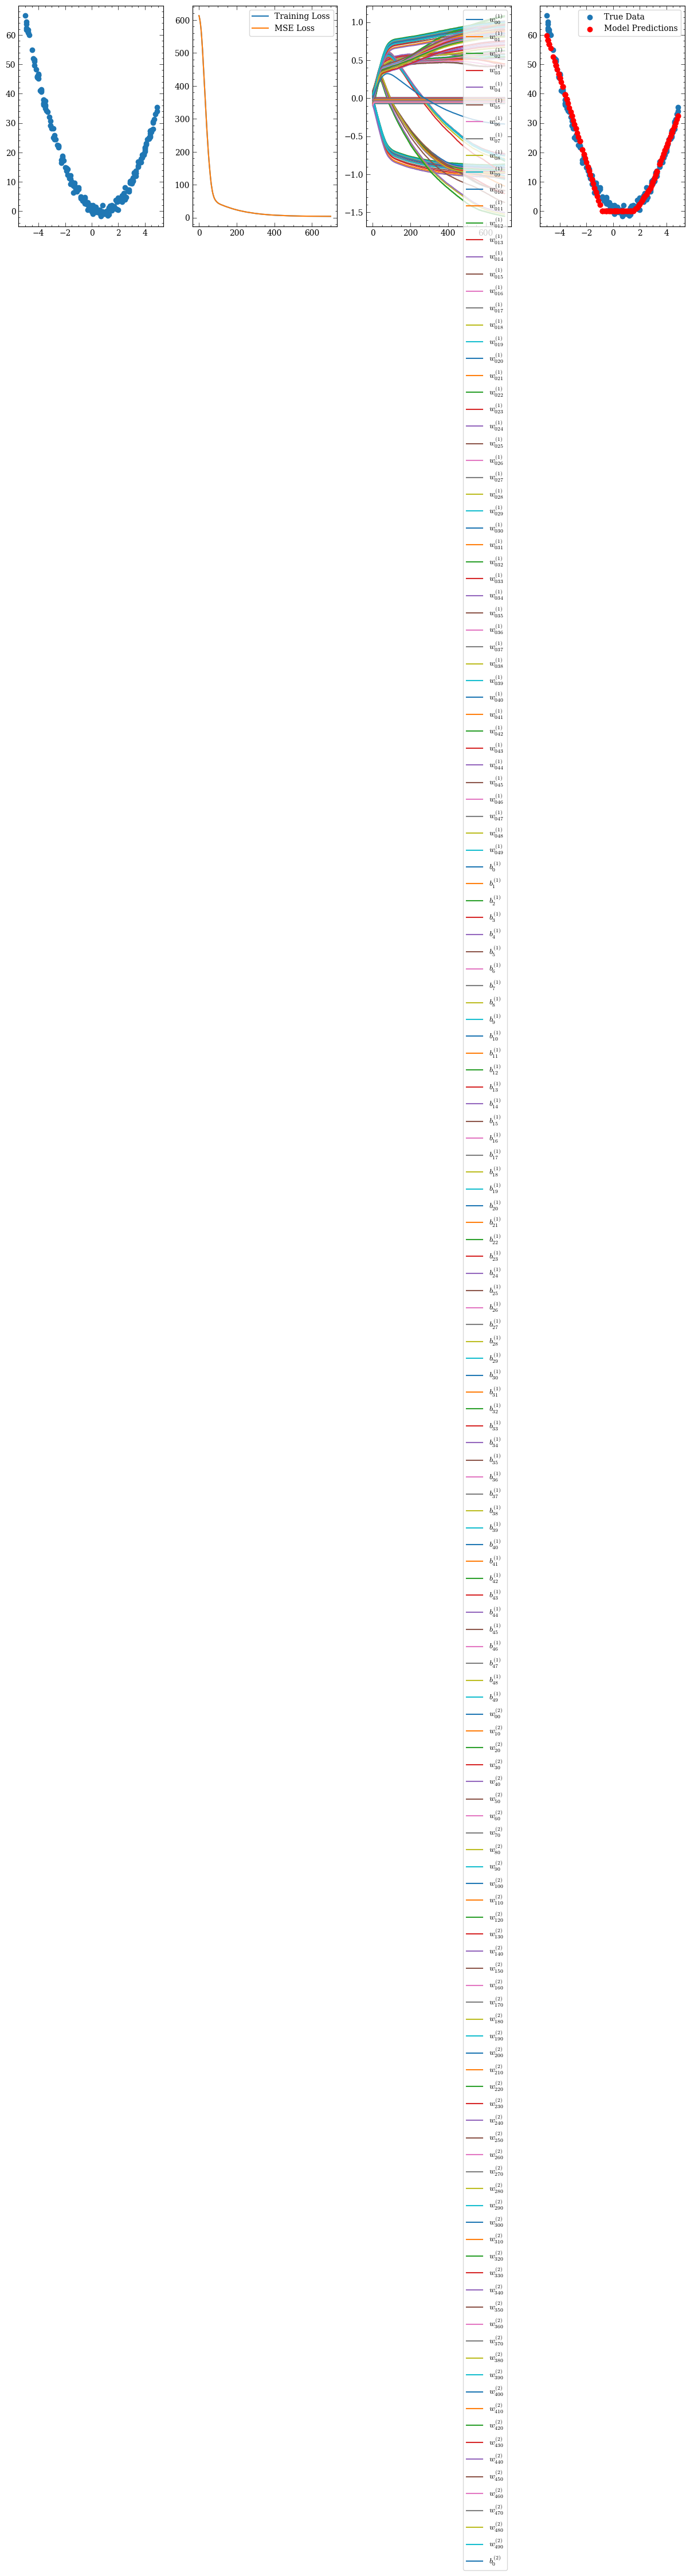

In [14]:
# (1): Create a TensorFlow network:
tensorflow_network_2 = NetworkBuilder().build_network()

# (2): Train the network:
collect_weights_and_biases_callback = WeightsBiasesCallback(tensorflow_network_2)
history_of_training_2 = tensorflow_network_2.fit(
    training_x_data_medium, 
    training_y_data_medium, 
    epochs = 700,
    callbacks = [
        collect_weights_and_biases_callback
        ],
    verbose = 1)

# (3): Construct the loss plot:
training_loss_data_2 = history_of_training_2.history['loss']
mean_squared_error_2 = history_of_training_2.history['mean_squared_error']
plt.plot(training_loss_data_2, label='Training Loss')
plt.plot(mean_squared_error_2, label='MSE Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss [MSE]')
plt.legend()
plt.show()

model_predictions_2 = tensorflow_network_2.predict(training_x_data_medium)

plt.scatter(training_x_data_medium, training_y_data_medium, label = 'True Data')
plt.scatter(training_x_data_medium, model_predictions_2, color = 'red', label = 'Model Predictions')
plt.legend()
plt.show()

figure, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 5)) 

axes[0].scatter(training_x_data_medium, training_y_data_medium)

training_loss_data_2 = history_of_training_2.history['loss']
mean_squared_error_2 = history_of_training_2.history['mean_squared_error']

axes[1].plot(training_loss_data_2, label='Training Loss')
axes[1].plot(mean_squared_error_2, label='MSE Loss')
axes[1].legend()

weights_biases_history = collect_weights_and_biases_callback.weights_biases_history

for key, values in weights_biases_history.items():
    print(f'{key} - Values over epochs: {values}')

for key, values in weights_biases_history.items():
    print(key)
    axes[2].plot(values, label = r"${}$".format(key))
    axes[2].legend()

axes[3].scatter(training_x_data_medium, training_y_data_medium, label='True Data')
axes[3].scatter(training_x_data_medium, model_predictions_2, color='red', label='Model Predictions')
axes[3].legend()

### (4.3): Constructing the "Sparse Network":

> Received input: 2 (<class 'int'>).
> Received input: 2 (<class 'int'>). Exiting...
> User defined 2 Layers in the network.
> [1]: Obtained number of ANN hidden layers.
> Received input: 50 (<class 'int'>).
> Received input: 50 (<class 'int'>). Exiting...
> User defined Layer #1 to have 50 nodes.
> Received input: 1 (<class 'int'>).
> Received input: 1 (<class 'int'>). Exiting...
> User defined Layer #2 to have 1 nodes.
> [2]: Obtained list with number of nodes per layer.
> Received input: relu (<class 'str'>).
> Received input: relu (<class 'str'>). Exiting...
> User defined layer number 1 to use relu activation.
> Received input: relu (<class 'str'>).
> Received input: relu (<class 'str'>). Exiting...
> User defined layer number 2 to use relu activation.
> [3]: Obtained activation functions for each layer.
> Received user input of mean squared error (<class 'str'>).
> Received user input of mean squared error (<class 'str'>). Exiting...
> [4]: Obtained the network's loss function.
>

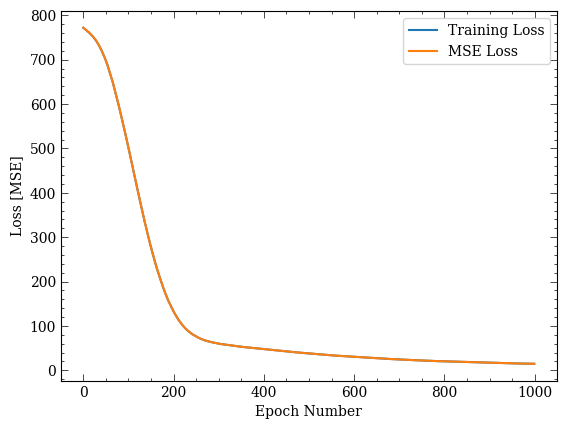

2/2 [==============================] - 0s 5ms/step


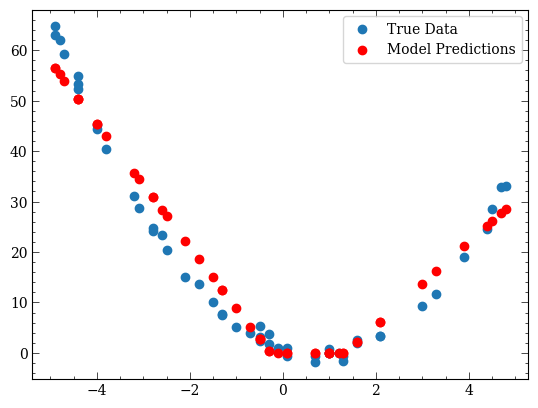

w^{(1)}_{00} - Values over epochs: [0.02392374, 0.022192597, 0.020576801, 0.018968662, 0.017421668, 0.015987428, 0.014804803, 0.013908921, 0.013354937, 0.013156191, 0.013398306, 0.0140399365, 0.015045024, 0.016347531, 0.017984604, 0.019815013, 0.021874407, 0.024067316, 0.026364887, 0.028805725, 0.031324774, 0.033924703, 0.036576755, 0.039288044, 0.04204343, 0.044881232, 0.047754463, 0.050631512, 0.053566195, 0.056448415, 0.059307106, 0.06220073, 0.06517072, 0.06810565, 0.07105197, 0.07405654, 0.077073194, 0.080124274, 0.08317247, 0.08604132, 0.089059345, 0.09213286, 0.095243685, 0.09839488, 0.10158766, 0.10477397, 0.10801439, 0.11125168, 0.114432424, 0.1176728, 0.12086571, 0.12399477, 0.12716748, 0.13034932, 0.13345823, 0.13644972, 0.13947442, 0.14253731, 0.1455251, 0.14859918, 0.15170197, 0.15480253, 0.15787739, 0.16104165, 0.16422842, 0.16737676, 0.1704697, 0.17344522, 0.17651306, 0.17954686, 0.18252763, 0.18549901, 0.1884859, 0.191436, 0.19450743, 0.19754198, 0.20057516, 0.2034937, 

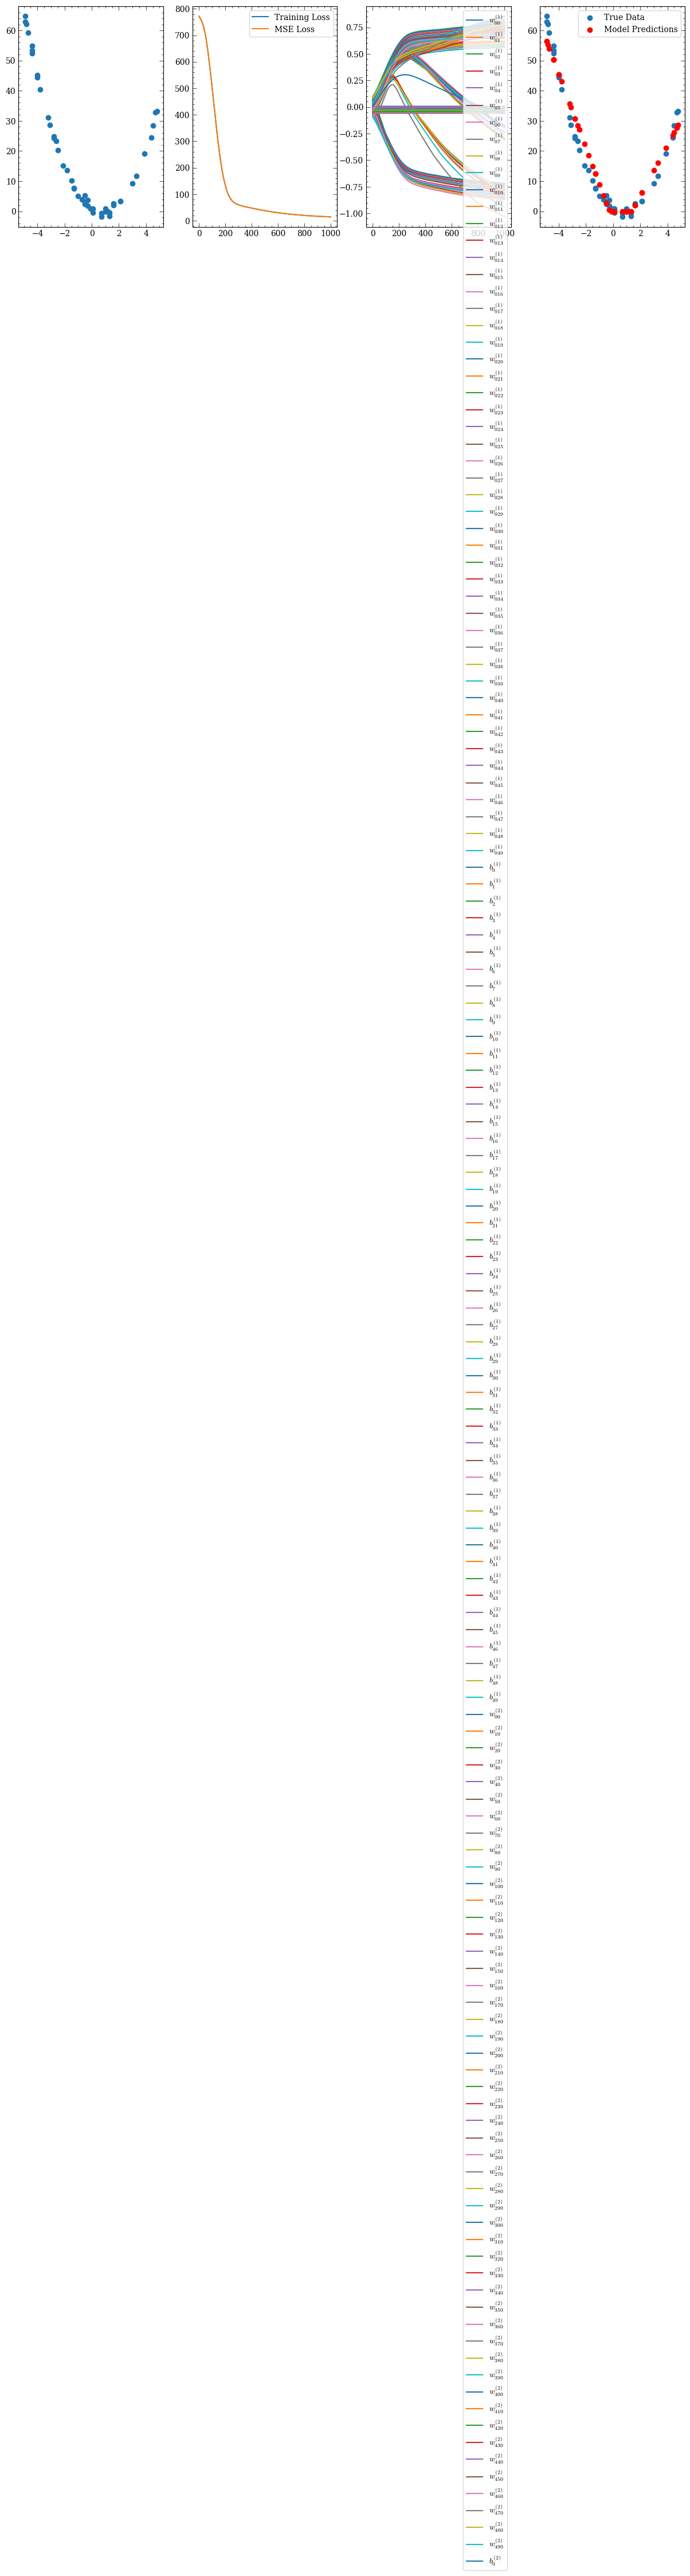

In [15]:
# (1): Create a TensorFlow network:
tensorflow_network_3 = NetworkBuilder().build_network()

# (2): Train the network:
collect_weights_and_biases_callback = WeightsBiasesCallback(tensorflow_network_1)
history_of_training_3 = tensorflow_network_3.fit(
    training_x_data_sparse, 
    training_y_data_sparse,
    epochs = 1000,
    callbacks = [collect_weights_and_biases_callback],
    verbose = 0)

# (3): Construct the loss plot:
training_loss_data_3 = history_of_training_3.history['loss']
mean_squared_error_3 = history_of_training_3.history['mean_squared_error']
plt.plot(training_loss_data_3, label='Training Loss')
plt.plot(mean_squared_error_3, label='MSE Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss [MSE]')
plt.legend()
plt.show()

model_predictions_3 = tensorflow_network_3.predict(training_x_data_sparse)

plt.scatter(training_x_data_sparse, training_y_data_sparse, label = 'True Data')
plt.scatter(training_x_data_sparse, model_predictions_3, color = 'red', label = 'Model Predictions')
plt.legend()
plt.show()

figure, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 5)) 

axes[0].scatter(training_x_data_sparse, training_y_data_sparse)

training_loss_data_3 = history_of_training_3.history['loss']
mean_squared_error_3 = history_of_training_3.history['mean_squared_error']

axes[1].plot(training_loss_data_3, label='Training Loss')
axes[1].plot(mean_squared_error_3, label='MSE Loss')
axes[1].legend()

weights_biases_history = collect_weights_and_biases_callback.weights_biases_history

for key, values in weights_biases_history.items():
    print(f'{key} - Values over epochs: {values}')

for key, values in weights_biases_history.items():
    print(key)
    axes[2].plot(values, label = r"${}$".format(key))
    axes[2].legend()

axes[3].scatter(training_x_data_sparse, training_y_data_sparse, label = 'True Data')
axes[3].scatter(training_x_data_sparse, model_predictions_3, color = 'red', label = 'Model Predictions')
axes[3].legend()

In [16]:
plt.show()

In [17]:
import os

def check_and_setup_directory_structure():
    """
    Description:
    ===================
    We do two things in this function:

    (1) We check if the desired directory structure is
    already built or not. Then, (2) if it's built and
    has no problems, we're done. Otherwise, we check
    for corruptions to the directory structure and 
    suggest the user to investigate the issues.

    Function Flow:
    ===================
    [1]: Establish the names of the directories
    that we are using.

    [2]: Use the `os` package ten thousand times to
    create Python-understandable "chain" of directories
    that can be navigated easily.
    """

    # (1): The static variables that describe our directories:
    _DIRECTORY_NAME_BASE = "Desktop"

    # artificial_neural_networks
    _DIRECTORY_NAME_MAIN = "artificial_neural_networks"

    # Desktop
    # - artificial_neural_networks
    # - - data_raw
    # - - data_preprocessed
    # - - models
    # - - - model_x
    # - - - - readme.md
    # - - - - metrics
    # - - - - graphics
    # - - - - replicas
    # - - - - - model_x_replica_1
    # - - - - - - replica_metrics
    # - - - - - - replica_graphics
    _DIRECTORY_NAME_BRANCH1_DATA_RAW = "data_raw"
    _DIRECTORY_NAME_BRANCH1_DATA_PREPROCESSESED = "data_preprocessed"
    _DIRECTORY_NAME_BRANCH1_MODELS = "models"

    # (2): Link the base directory with the "main" directory:
    directory_main1_ann = os.path.join(_DIRECTORY_NAME_BASE, _DIRECTORY_NAME_MAIN)

    # (3): Link the subdirectories with the "main" directory:
    directory_sub1_data_raw = os.path.join(directory_main1_ann, _DIRECTORY_NAME_BRANCH1_DATA_RAW)
    directory_sub2_data_preprocessed = os.path.join(directory_main1_ann, _DIRECTORY_NAME_BRANCH1_DATA_PREPROCESSESED)
    directory_sub3_models = os.path.join(directory_main1_ann, _DIRECTORY_NAME_BRANCH1_MODELS)

    # (4): Construct the list of directories to check:
    list_of_directories_to_check_existence_of = [
        directory_main1_ann, 
        directory_sub1_data_raw, 
        directory_sub2_data_preprocessed, 
        directory_sub3_models, 
    ]

    # (5): List-comprehend to find possible-missing directories in the desired structure:
    possible_missing_directories = [directory for directory in list_of_directories_to_check_existence_of if not os.path.exists(directory)]


    # (6.1): If there missing directories, we see if the user wants to build them:
    if possible_missing_directories:

        for directory in possible_missing_directories:
            
            while True:
                does_user_want_to_build_directory = input(f"[{__name__}] > Detected you are missing directory `{directory}`. Would you like to build it?")
                
                if does_user_want_to_build_directory.lower() not in ["True", "False", "true", "false"]:
                    print(f"[{__name__}] > User input was not recognized as a boolean value. Provide `true` or `false`")
                    continue

                else:
                    does_user_want_to_build_directory = bool(does_user_want_to_build_directory)

                if does_user_want_to_build_directory:
                    print(f"[{__name__}] > User agreed to construction of `{directory}`. Building...")
                    
                    try:
                        os.makedirs(name = directory)
                        print(f"[{__name__}] > Created `{directory}`")
                    
                    except Exception as ERROR:
                        print(f"[{__name__}] > Error creating new directory:\n[ERROR] > {ERROR}")

                else:
                    print(f"[{__name__}] > User declined to construction of `{directory}`. Continuing...")

                break

        return

    # (6.1): There are no missing directories! Exit the function.
    else:
        print(f"[{__name__}] > Desired directory structure intact.")
        return

def create_new_directory_for_ann_model(model_name: str):
    """
    Description:
    ===================
    We now create a subdirectory that contains (or
    will contain) all the metrics we use to measure
    or evaluate our model with.

    Function Flow:
    ===================
    [1]: Establish the names of the directories
    that we are using.

    [2]: Use the `os` package ten thousand times to
    create Python-understandable "chain" of directories
    that can be navigated easily.
    """
    
    # (1): The static variables that describe our directories:
    _DIRECTORY_NAME_BASE = "ANN_CFF"

    # artificial_neural_networks
    _DIRECTORY_NAME_MAIN = "artificial_neural_networks"

    # Desktop
    # - artificial_neural_networks
    # - - models
    _DIRECTORY_NAME_BRANCH1_MODELS = "models"

    # Desktop
    # - artificial_neural_networks
    # - - models
    # - - - model_x
    # - - - - readme.md
    # - - - - metrics
    # - - - - graphics
    _DIRECTORY_NAME_BRANCH1_MODELS = "models"
    _DIRECTORY_NAME_BRANCH3_METRICS = "metrics"
    _DIRECTORY_NAME_BRANCH3_GRAPHICS = "graphics"

    # (2): Link the base directory with the "main" directory:
    directory_main1_ann = os.path.join(_DIRECTORY_NAME_BASE, _DIRECTORY_NAME_MAIN)

    # (3): Link the subdirectories with the "main" directory:
    directory_sub3_models = os.path.join(directory_main1_ann, _DIRECTORY_NAME_BRANCH1_MODELS)

    # (4): List-comprehend to find possible-missing directories in the desired structure:
    full_path = os.path.join(directory_sub3_models, model_name)

    # (5.1): If the full-path to the model exists, then this model has been used before:
    if os.path.exists(full_path):
        print(f"> Suspicious... Model already exists. Exiting...")
        return None
    
    # (5.2): Create the directory:
    else:
        print(f"> Creating new directory to store {model_name} data...")
        
        try:
            os.makedirs(full_path)
            print(f"[{__name__}] > Created {model_name}")

            os.makedirs(os.path.join(full_path, _DIRECTORY_NAME_BRANCH3_METRICS))
            print(f"[{__name__}] > Created {model_name}/{_DIRECTORY_NAME_BRANCH3_METRICS}")

            os.makedirs(os.path.join(full_path, _DIRECTORY_NAME_BRANCH3_GRAPHICS))
            print(f"[{__name__}] > Created {model_name}/{_DIRECTORY_NAME_BRANCH3_GRAPHICS}")

        except Exception as ERROR:
            print(f"[{__name__}] > Error creating new directory:\n[ERROR] > {ERROR}")

def save_matplotlib_figure(
        matplotlib_figure: plt.figure,
        directory_for_model_data,
        figure_name: str):
    """
    """
    if figure_name == "":
        figure_name = "DEFAULT_FIGURE_NAME"

    try:
        matplotlib_figure.savefig(
            os.path.join(directory_for_model_data, figure_name),
            transparent = None, 
            dpi = 'figure',
            format = None,
            metadata = None,
            bbox_inches = None,
            pad_inches = 0.1,
            facecolor = 'auto',
            edgecolor = 'auto',
            backend = None)

        plt.close('all')

        return None

    except Exception as ERROR:
        print(f"> Error saving all the figures:\n> {ERROR}")
        return None



In [18]:
# (1): Create a TensorFlow network:
tensorflow_network_4 = NetworkBuilder()
tensorflow_network_4.build_network()

# (2): Check the relevant directory structure:
check_and_setup_directory_structure()

# (3): Create a new directory for all the data from the model:
directory_for_model_data = create_new_directory_for_ann_model(tensorflow_network_4.model_name)
print(directory_for_model_data)

# (4): Train the network:
collect_weights_and_biases_callback = WeightsBiasesCallback(tensorflow_network_4)

NUMBER_OF_MODEL_EPOCHS = 1000

history_of_training_4 = tensorflow_network_4.tensorflow_network.fit(
    training_x_data_sparse, 
    training_y_data_sparse,
    epochs = NUMBER_OF_MODEL_EPOCHS,
    callbacks = [collect_weights_and_biases_callback],
    verbose = 1)

# (5): Construct the loss plot:
figure_training_loss_data, axes_training_loss_data = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10)) 
training_loss_data_4 = history_of_training_4.history['loss']
mean_squared_error_4 = history_of_training_4.history['mean_squared_error']

axes_training_loss_data.plot(training_loss_data_4, label = 'Training Loss')
axes_training_loss_data.plot(mean_squared_error_4, label = 'MSE Loss')
axes_training_loss_data.set_xlabel(
    'Epoch Number', 
    fontsize = 18, 
    fontweight = 'normal', 
    color = 'black', 
    rotation = 0, 
    ha = 'center')
axes_training_loss_data.set_ylabel(
    'Loss [MSE]',
    fontsize = 18, 
    fontweight = 'normal', 
    color = 'black', 
    rotation = 0,       
    ha = 'center')
axes_training_loss_data.legend()

_DIRECTORY_NAME_BRANCH3_GRAPHICS = "graphics"

save_matplotlib_figure(
    figure_training_loss_data,
    os.path.join(directory_for_model_data, _DIRECTORY_NAME_BRANCH3_GRAPHICS),
    figure_name = "model_loss")

model_predictions_4 = tensorflow_network_4.tensorflow_network.predict(training_x_data_sparse)

# (5): Construct the loss plot:
figure_weights_biases_data, axes_weights_biases_data = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10)) 
weights_biases_history = collect_weights_and_biases_callback.weights_biases_history
cmap = get_cmap('tab10')
for index, (key, values) in enumerate(weights_biases_history.items()):
    axes_weights_biases_data.plot(values, color = cmap(index), label = r"${}$".format(key))

save_matplotlib_figure(
    figure_weights_biases_data,
    directory_for_model_data,
    figure_name = "model_parameters")

> Layer number must be a positive, nonzero integer. Continuing...
> Layer number must be a positive, nonzero integer. Continuing...
> Layer number must be a positive, nonzero integer. Continuing...
> Layer number must be a positive, nonzero integer. Continuing...
> Layer number must be a positive, nonzero integer. Continuing...
> Layer number must be a positive, nonzero integer. Continuing...


: 

: 

In [ ]:
import numpy as np

def find_max_derivative_x(x_values, y_values):
    # Calculate the derivative of the array
    derivative = np.gradient(y_values)
    print(derivative)

    # Find the maximum derivative and its corresponding indices
    max_derivative = np.max(derivative)
    print(max_derivative)
    max_indices = np.where(derivative == max_derivative)[0]

    # Handle negative derivatives
    if max_derivative < 0:
        max_derivative = np.min(derivative)
        max_indices = np.where(derivative == max_derivative, x_values, y_values)[0]

    return max_indices

# Example usage
x_values = np.linspace(0, 10, 100)
y_values = np.sin(x_values)  # Example function, replace with your own array

max_derivative_indices = find_max_derivative_x(x_values, y_values)
print("Indices with the highest derivative:", max_derivative_indices)


In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3, 3), linewidth=1, edgecolor='black')
fig.text(.2, .7, "plain text: alpha > beta")
fig.text(.2, .5, "Mathtext: $\\alpha > \\beta$")
fig.text(.2, .3, r"raw string Mathtext: $\alpha > \beta$")
plt.show()

In [ ]:
fig = plt.figure(figsize=(3, 3), linewidth=1, edgecolor='black')
fig.suptitle("Number of unescaped $")
fig.text(.1, .7, r"odd: $ \alpha $ = $1")
fig.text(.1, .5, r"even: $ \beta $= $ 2 $")
fig.text(.1, .3, r'odd: $ \gamma $= \$3 $')
fig.text(.1, .1, r'even: $ \delta $ = $ \$4 $')
plt.show()

In [ ]:
def read_csv_file_with_pandas(name_of_csv_file: str) -> pd.DataFrame:
    """
    Description
    --------------
    We are using Pandas to read the .csv file. If this works, then the
    function will return the 

    Parameters
    --------------
    name_of_csv_file: str
    
    Returns
    --------------
    pandas_read_csv: Pandas DF

    Function Flow
    --------------
    (1): Try to read the CSV with Pandas. If it works,
        it works. YAY! If it don't, then return None.
    
    Notes
    --------------
    """
    try:
        pandas_read_csv = pd.read_csv(name_of_csv_file)
        return pandas_read_csv
    except Exception as E:
        print(f"> Error reading the .csv file with Pandas:\n> {E}")
        return None

In [ ]:
jlab_pandas_df = read_csv_file_with_pandas('jlab_kinematics.csv')
jlab_pandas_df.head()

k    QQ    x_b      t  phi_x         F   sigmaF       ReH   ReE  \
0  5.75  1.82  0.343 -0.172    7.5  0.120053  0.00492 -0.992404 -0.31   
1  5.75  1.82  0.343 -0.172   22.5  0.114969  0.00468 -0.992404 -0.31   
2  5.75  1.82  0.343 -0.172   37.5  0.106078  0.00420 -0.992404 -0.31   
3  5.75  1.82  0.343 -0.172   52.5  0.095266  0.00396 -0.992404 -0.31   
4  5.75  1.82  0.343 -0.172   67.5  0.084249  0.00360 -0.992404 -0.31   

       ReHt      dvcs  
0 -0.396272  0.017761  
1 -0.396272  0.017761  
2 -0.396272  0.017761  
3 -0.396272  0.017761  
4 -0.396272  0.017761

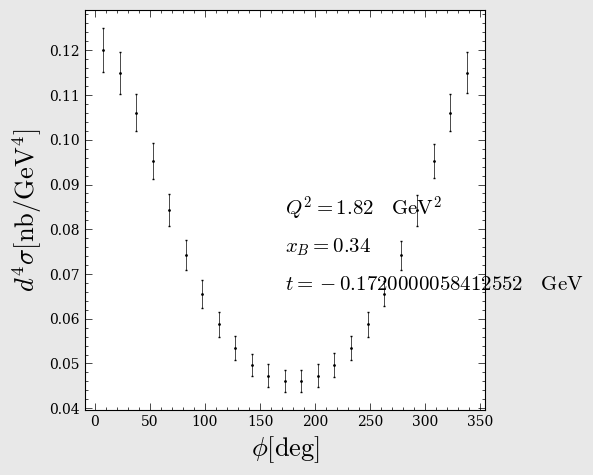

In [ ]:
def get_distinct_numbers(column):
    unique_numbers = column.unique()
    return unique_numbers.tolist()

def find_indices_for_values(df, x_b_value, QQ_value, decimal_places = 3):
    # Round the values in the DataFrame to the specified decimal places
    rounded_df = df.round({ 'x_b': decimal_places, 'QQ': decimal_places })
    
    # Find the indices where the rounded values match the fixed and unique values
    indices = rounded_df[(rounded_df['x_b'] == x_b_value) & (rounded_df['QQ'] == QQ_value)].index
    
    # Get the range of indices
    start_index = indices.min() if not indices.empty else None
    end_index = indices.max() if not indices.empty else None
    
    return start_index, end_index

def construct_cross_section_versus_phi(
    fixed_kinematic_Q_squared: float,
    fixed_kinematic_x_Bjorken: float,
    fixed_kinematic_t_momentum: pd.DataFrame,
    cross_section_column: pd.DataFrame,
    cross_section_errors_column: pd.DataFrame,
    phi_azimuth_column: pd.DataFrame
    ) -> plt.figure:
    """
    Description
    --------------
    Construct a lot of F (cross-section) versus phi at 
    some predetermined, fixed kinematics.

    Parameters
    --------------
    fixed_kinematic_Q_squared: float
    
    fixed_kinematic_x_Bjorken: float

    fixed_kinematic_t_momentum: pd.DataFrame

    cross_section_column: pd.DataFrame

    cross_section_errors_column: pd.DataFrame

    phi_azimuth_column: pd.DataFrame
    
    Returns
    --------------
    figure_object: plt.figure

    Function Flow
    --------------
    
    Notes
    --------------
    """
    plt.rcParams["mathtext.fontset"] = "cm"

    _FIGURE_X_AXIS_WIDTH_IN_INCHES = 2.
    _FIGURE_Y_AXIS_HEIGHT_IN_INCHES = 2.
    FIGURE_DIMENSION = (_FIGURE_X_AXIS_WIDTH_IN_INCHES, _FIGURE_Y_AXIS_HEIGHT_IN_INCHES)

    _FIGURE_DOTS_PIXELS_PER_INCH = 100.0

    # number_of_unique_t_values = get_distinct_numbers(fixed_kinematic_t_momentum)
    # print(f"> Found {number_of_unique_t_values} t values. Now enlisting {number_of_unique_t_values} subplots...")

    # (1): Initialize the Figure:
    figure_object = plt.figure(
        figsize = FIGURE_DIMENSION,
        dpi = _FIGURE_DOTS_PIXELS_PER_INCH,
        facecolor = "#e8e8e8"
    )

    # (2): Add an Axis to the Main Figure:
    AXES_ONE_LEFT = 0.
    AXES_ONE_BOTTOM = 0.
    AXES_ONE_WIDTH = 1.0 * _FIGURE_X_AXIS_WIDTH_IN_INCHES
    AXES_ONE_HEIGHT = 1.0 * _FIGURE_Y_AXIS_HEIGHT_IN_INCHES
    axes_object = figure_object.add_axes(
        (AXES_ONE_LEFT, AXES_ONE_BOTTOM, AXES_ONE_WIDTH, AXES_ONE_HEIGHT)
        )

    # (3): Configure the Axes Objects:
    axes_object.set_xlabel('X Label', fontfamily='serif')
    axes_object.set_ylabel('Y Label', fontfamily='serif')
    
    # Set x axis ticks
    axes_object.tick_params(axis = 'x', direction = 'in', which = 'both', top = True)
    axes_object.tick_params(axis = 'x', which = 'major', length = 5, width = 0.5)
    axes_object.tick_params(axis = 'x', which = 'minor', length = 2.5, width = 0.5)
    axes_object.minorticks_on()

    # Set y axis ticks
    axes_object.tick_params(axis = 'y', direction='in', which = 'both', right = True)
    axes_object.tick_params(axis = 'y', which = 'major', length = 5, width = 0.5)
    axes_object.tick_params(axis = 'y', which = 'minor', length = 2.5, width = 0.5)
    axes_object.minorticks_on()
    
    # (4): Plot the data:
    axes_object.errorbar(
        x = phi_azimuth_column,
        y = cross_section_column,
        yerr = cross_section_errors_column,
        color = 'black',
        linestyle = '', 
        marker = 'o',
        markersize = 1.0,
        ecolor = 'black',
        elinewidth = 0.5,
        capsize = 1)
    
    # (5): Annotate the figure:

    # (5.1): Prepare the annotation text:
    annotation_Q_squared = r"$Q^{{2}} = {} \quad \text{{GeV}}^{{2}}$".format(fixed_kinematic_Q_squared)
    annotation_x_Bjorken = r"$x_{{B}} = {} $".format(fixed_kinematic_x_Bjorken)
    annotation_t = r"$t = {} \quad \text{{GeV}} $".format(fixed_kinematic_t_momentum)

    # (5.2): Figure out the positions of the annotations by getting the max and min of both axes:
    maximum_cross_section_value = np.max(cross_section_column)
    minimum_cross_section_value = np.min(cross_section_column)
    middle_cross_section_value = (maximum_cross_section_value + minimum_cross_section_value) / 2
    maximum_phi_value = np.max(phi_azimuth_column)
    minimum_phi_value = np.min(phi_azimuth_column)
    middle_phi_value = (maximum_phi_value + minimum_phi_value) / 2

    # (5.3): Assign the positions of the annotations:
    increment = middle_cross_section_value / 10
    xy_position_of_Q_squared_annotation = (middle_phi_value, middle_cross_section_value)
    xy_position_of_x_Bjorken_annotation = (middle_phi_value, middle_cross_section_value - increment)
    xy_position_of_t_momentum_annotation = (middle_phi_value, middle_cross_section_value - 2 * increment)

    plt.xlabel(r"$\phi [\text{deg}]$", fontsize = 19)
    plt.ylabel(r"$d^{4} \sigma [\text{nb}/\text{GeV}^{{4}}]$", fontsize = 19)
    plt.annotate(
        annotation_Q_squared,
        xy_position_of_Q_squared_annotation,
        fontsize = 15
    )
    plt.annotate(
        annotation_x_Bjorken,
        xy_position_of_x_Bjorken_annotation,
        fontsize = 15
    )
    plt.annotate(
        annotation_t,
        xy_position_of_t_momentum_annotation,
        fontsize = 15
    )
        
    return figure_object

rounded_jlab_data = jlab_pandas_df.round({ 'x_b': 2, 'QQ': 2 })
rounded_jlab_data.head()

test_Q_squared_value = rounded_jlab_data["QQ"][0]
test_x_B_value = rounded_jlab_data["x_b"][0]

start_index_for_t_values, end_index_for_t_values = find_indices_for_values(
    rounded_jlab_data,
    x_b_value = test_x_B_value,
    QQ_value = test_Q_squared_value,
    decimal_places = 3
)

training_x_data_7 = rounded_jlab_data["phi_x"][start_index_for_t_values:end_index_for_t_values]
training_y_data_7 = rounded_jlab_data["F"][start_index_for_t_values:end_index_for_t_values]


construct_cross_section_versus_phi(
    test_Q_squared_value,
    test_x_B_value,
    rounded_jlab_data["t"][0],
    training_y_data_7,
    rounded_jlab_data["sigmaF"][start_index_for_t_values:end_index_for_t_values],
    training_x_data_7
)

> Received input: 4 (<class 'int'>).
> Received input: 4 (<class 'int'>). Exiting...
> User defined 4 Layers in the network.
> [1]: Obtained number of ANN hidden layers.
> Received input: 32 (<class 'int'>).
> Received input: 32 (<class 'int'>). Exiting...
> User defined Layer #1 to have 32 nodes.
> Received input: 32 (<class 'int'>).
> Received input: 32 (<class 'int'>). Exiting...
> User defined Layer #2 to have 32 nodes.
> Received input: 32 (<class 'int'>).
> Received input: 32 (<class 'int'>). Exiting...
> User defined Layer #3 to have 32 nodes.
> Received input: 1 (<class 'int'>).
> Received input: 1 (<class 'int'>). Exiting...
> User defined Layer #4 to have 1 nodes.
> [2]: Obtained list with number of nodes per layer.
> Received input: relu (<class 'str'>).
> Received input: relu (<class 'str'>). Exiting...
> User defined layer number 1 to use relu activation.
> Received input: relu (<class 'str'>).
> Received input: relu (<class 'str'>). Exiting...
> User defined layer number 

C:\Users\fiore\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


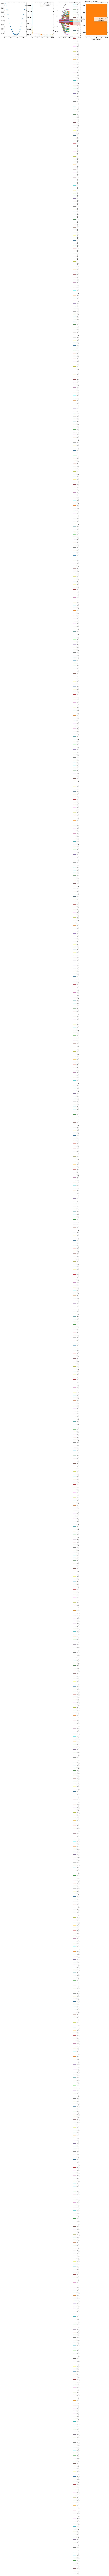

1/1 [==============================] - 0s 138ms/step


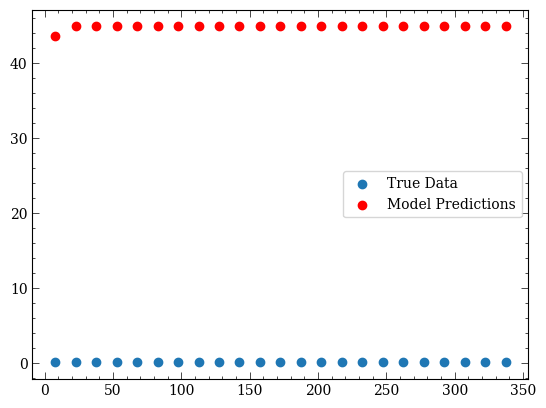

In [ ]:
# (1): Create a TensorFlow network:
tensorflow_network_7 = NetworkBuilder().build_network()

# (2): Train the network:
collect_weights_and_biases_callback = WeightsBiasesCallback(tensorflow_network_7)
history_of_training_7 = tensorflow_network_7.fit(
    training_x_data_7, 
    training_y_data_7, 
    epochs = 2000,
    # validation_split = 0.2, # https://www.tensorflow.org/guide/keras/training_with_built_in_methods#automatically_setting_apart_a_validation_holdout_set
    callbacks = [collect_weights_and_biases_callback],
    verbose = 1)

# (3): Construct the loss plot:
training_loss_data_7 = history_of_training_7.history['loss']
mean_squared_error_7 = history_of_training_7.history['mean_squared_error']
plt.plot(training_loss_data_7, label='Training Loss')
plt.plot(mean_squared_error_7, label='MSE Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss [MSE]')
plt.legend()
plt.show()

model_predictions_7 = tensorflow_network_1.predict(training_x_data_7)

plt.scatter(training_x_data_7, training_y_data_7, label='True Data')
plt.scatter(training_x_data_7, model_predictions_7, color='red', label='Model Predictions')
plt.legend()
plt.show()

figure, network_axes = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 5)) 

network_axes[0].scatter(training_x_data_7, training_y_data_7)

training_loss_data_7 = history_of_training_7.history['loss']
mean_squared_error_7 = history_of_training_7.history['mean_squared_error']

network_axes[1].plot(training_loss_data_7, label='Training Loss')
network_axes[1].plot(mean_squared_error_7, label='MSE Loss')
network_axes[1].legend()

weights_biases_history = collect_weights_and_biases_callback.weights_biases_history

for key, values in weights_biases_history.items():
    network_axes[2].plot(values, label = r"${}$".format(key))
    network_axes[2].legend()

network_axes[3].scatter(training_x_data_7, training_y_data_7, label='True Data')
network_axes[3].scatter(training_x_data_7, model_predictions_7, color='red', label='Model Predictions')
network_axes[3].legend()

In [ ]:
plt.show()